In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy.stats as s


# MAP PENALTY

Text(0.5, 0, 'Elevation in $m$')

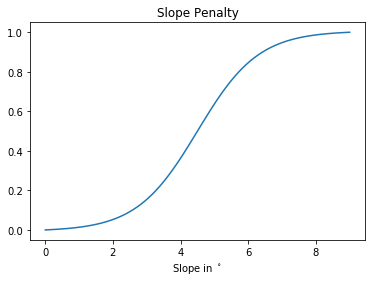

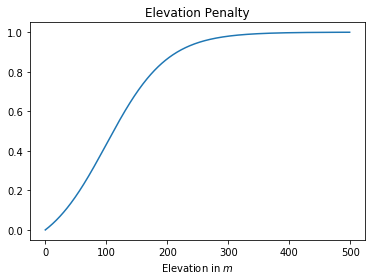

In [2]:
MapPenalty_Kappa = 5
EI_midpoints_elev = np.arange(0,500)
def mapPenalty_El(MapPenalty_Kappa, Penalty50_SettlementElev):
    shifted_tanh = lambda x,mu:  np.tanh(MapPenalty_Kappa*(x-mu))
    MapPenalty50 = Penalty50_SettlementElev/max(EI_midpoints_elev)
    map_penalty_elev = shifted_tanh(EI_midpoints_elev/max(EI_midpoints_elev), MapPenalty50)
    map_penalty_elev_scaled = 1/(shifted_tanh(1,MapPenalty50)-shifted_tanh(0,MapPenalty50)) * (map_penalty_elev-shifted_tanh(0,MapPenalty50))
    return map_penalty_elev_scaled
MaxSettlementSlope = 9
EI_midpoints_slope = np.linspace(0,MaxSettlementSlope, num=500)
def mapPenalty_Slope(MapPenalty_Kappa):
    shifted_tanh = lambda x,mu:  np.tanh(MapPenalty_Kappa*(x-mu))

    map_penalty_slope = shifted_tanh(EI_midpoints_slope/(MaxSettlementSlope), 0.5)
    map_penalty_slope_scaled = 1/(shifted_tanh(1,0.5)-shifted_tanh(0,0.5)) * (map_penalty_slope-shifted_tanh(0,0.5))
    return map_penalty_slope_scaled

mapPenalty_Slope = mapPenalty_Slope(MapPenalty_Kappa)

map_penalty_elev = mapPenalty_El(MapPenalty_Kappa, 100)

#map_penalty = np.maximum(map_penalty_elev, mapPenalty_Slope)
plt.title("Slope Penalty")
plt.plot(EI_midpoints_slope, mapPenalty_Slope)
plt.xlabel("Slope in $^\circ$")
plt.figure()
plt.title("Elevation Penalty")
plt.plot(EI_midpoints_elev, map_penalty_elev)
plt.xlabel("Elevation in $m$")

################################
## Allowed Settlements! #####
################################
#self.slopes_cond = self.EI_midpoints_slope < config.MaxSettlementSlope
#self.slopes_cond[np.where(self.water_penalties == 0)] = 0
# AND POPULATION DENSITY


# TREE PREFERENCE

# Repr

Text(0.5, 0, 'Agent Population $p_i(t)$')

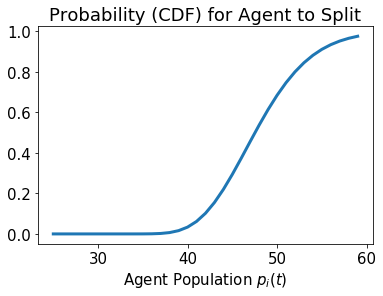

In [8]:
mu, sig = (48-2*15, 5 )
k = mu**2/sig**2
theta = sig**2 / mu
a = lambda x: s.gamma.cdf(x, k,scale=theta)
x = np.arange(-5, 30)
plt.rcParams.update({"font.size":15})
plt.plot(x + 2*15,a(x), lw=3)
plt.title("Probability (CDF) for Agent to Split")
plt.xlabel("Agent Population $p_i(t)$")

# REproduction Growth Rate

In [93]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes


In [114]:
x= np.linspace(0,1, 200)

1.95
Food Fraction at which equilibrium food [0.68844221]
g[1]= 1.007
3
Food Fraction at which equilibrium food [0.84422111]
g[1]= 1.007
1.95
3


(<mpl_toolkits.axes_grid1.inset_locator.BboxPatch at 0x7f5382705a20>,
 <mpl_toolkits.axes_grid1.inset_locator.BboxConnector at 0x7f5382705f98>)

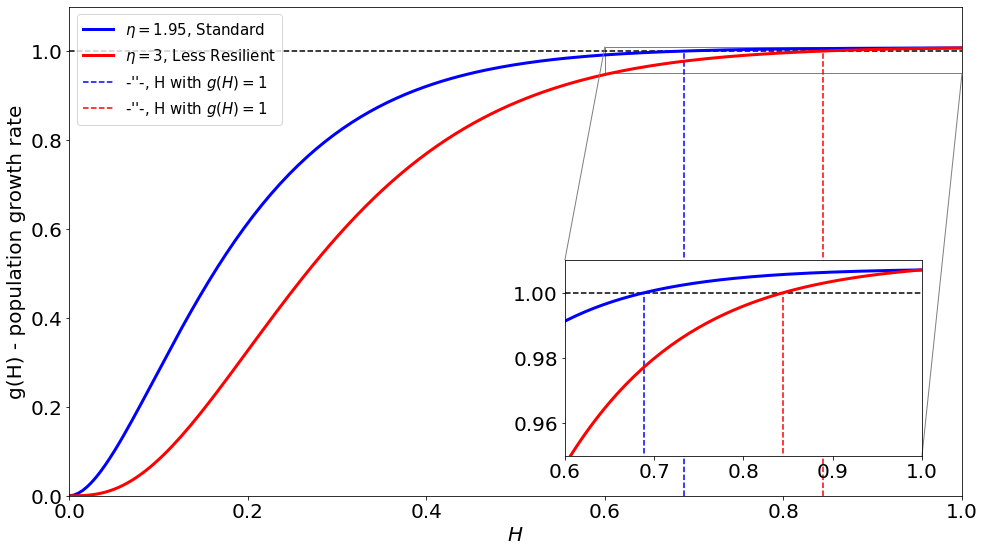

In [116]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(111)
plt.rcParams.update({"font.size":20})
etas = [1.95,3]
text = ["Standard", "Less Resilient"]
colors=["blue", "red"]
for n,eta in enumerate(etas):
    print(eta)
    g_unscaled = s.gamma.cdf(x,eta, scale = 0.1)#.astype(int))
    g=1.007/g_unscaled[-1] * g_unscaled
    equal = x[np.where(np.min(abs(g-1)) == abs(g-1))]
    print("Food Fraction at which equilibrium food", equal)
    print("g[1]=", g[-1])
    ax.plot(x,g, lw=3, color=colors[n], label=r"$\eta=$"+str(eta)+", "+text[n])
    ax.vlines(equal, 0,1, color=colors[n], linestyles="--", label="-''-, H with $g(H)=1$")
ax.legend(fontsize=15)
ax.set_xlabel("$H$")
ax.set_ylabel("g(H) - population growth rate")
ax.set_ylim(0,1.1)
ax.set_xlim(0,1)
ax.hlines(1,0,1, linestyles= '--')


ax2 = inset_axes(ax,
                    width="40%", # width = 30% of parent_bbox
                    height="40%", # height : 1 inch
                    loc=4, 
                    borderpad = 2)
for n,eta in enumerate(etas):
    print(eta)
    g_unscaled = s.gamma.cdf(x,eta, scale = 0.1)#.astype(int))
    g=1.007/g_unscaled[-1] * g_unscaled
    equal = x[np.where(np.min(abs(g-1)) == abs(g-1))]
    ax2.plot(x,g, lw=3, color=colors[n], label=r"$\eta=$"+str(eta)+", "+text[n])
    ax2.vlines(equal, 0,1, color=colors[n], linestyles="--", label="-''-, H with $g(H)=1$")
ax2.set_ylim(0.95,1.01)
ax2.set_xlim(0.6,1)
ax2.hlines(1, ax2.get_xlim()[0],1, linestyles= '--')

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, ax2, loc1=2, loc2=4, fc="none", ec="0.5")

#from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
#axins = zoomed_inset_axes(ax, 2.5, loc=2)

In [90]:
ax2.get_xlim()[0]

0.6

In [97]:
zoomed_inset_axes?

Signature:
zoomed_inset_axes(
    parent_axes,
    zoom,
    loc='upper right',
    bbox_to_anchor=None,
    bbox_transform=None,
    axes_class=None,
    axes_kwargs=None,
    borderpad=0.5,
)
Docstring:
Create an anchored inset axes by scaling a parent axes. For usage, also see
:doc:`the examples </gallery/axes_grid1/inset_locator_demo2>`.

Parameters
----------
parent_axes : `matplotlib.axes.Axes`
    Axes to place the inset axes.

zoom : float
    Scaling factor of the data axes. *zoom* > 1 will enlargen the
    coordinates (i.e., "zoomed in"), while *zoom* < 1 will shrink the
    coordinates (i.e., "zoomed out").

loc : int or string, optional, default to 1
    Location to place the inset axes. The valid locations are::

        'upper right'  : 1,
        'upper left'   : 2,
        'lower left'   : 3,
        'lower right'  : 4,
        'right'        : 5,
        'center left'  : 6,
        'center right' : 7,
        'lower center' : 8,
        'upper center' : 9,
        'cen

array([0.87755102])

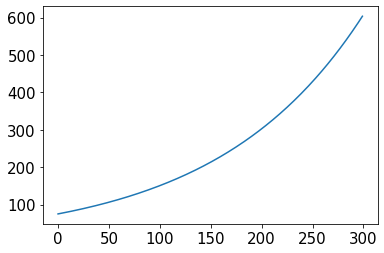

In [37]:
a = 1.007**t * 75
plt.plot(t,a)

# Population growth with H=1

Text(0.5, 0, 'Time')

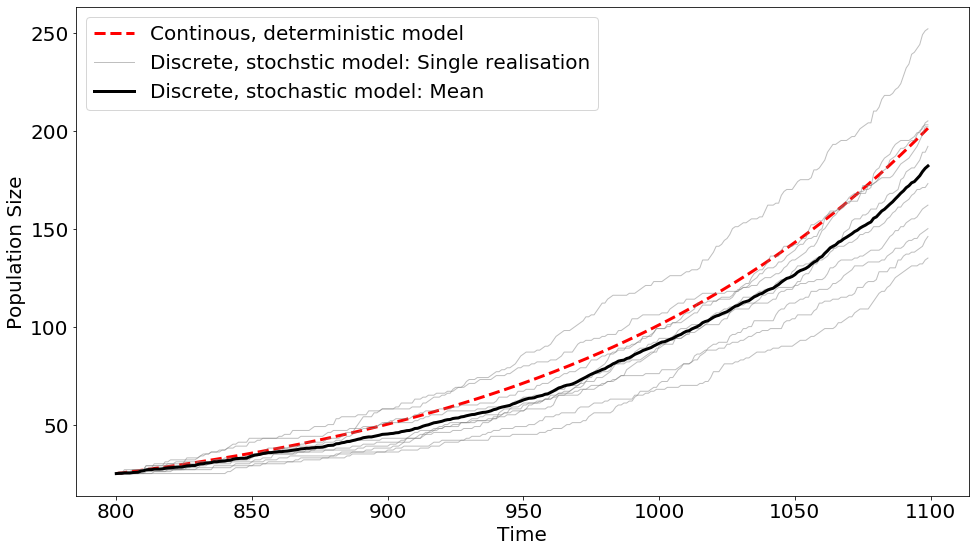

In [108]:
plt.figure(figsize=(16,9))
plt.rcParams.update({"font.size":20})
pop0 = 25
t = np.arange(800, 1100)
a = 1.007**(t-800) * pop0
plt.plot(t,a, "--",lw=3, color='red', label="Continous, deterministic model")
all_b_arr = []
all_c_arr =  []
for k in range(10):
    b=pop0
    b_arr=[]
    for tt in t-800:
        for bb in range(b):
            if np.random.random()<0.007:
                b+=1
        b_arr.append(b)
    all_b_arr.append(b_arr)
    plt.plot(t,b_arr, lw=1, alpha=0.5, color='gray')
plt.plot([],[], lw=1, alpha=0.5, color='gray', label="Discrete, stochstic model: Single realisation")
all_b_arr=np.array(all_b_arr)
plt.plot(t,np.mean(all_b_arr, axis=0),lw=3, color="black", label="Discrete, stochastic model: Mean")
#plt.yscale('log')
plt.legend(fontsize=20)
plt.ylabel("Population Size")
plt.xlabel("Time")